# Github Link: 

# Here i have implemented 3 types of autoencoders are described using the Keras framework and the MNIST dataset

1. Vanilla autoencoders
2. Multilayer autoencoder
3. Convolutional autoencoder

#Importing the libraries

In [25]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape

from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

#Load the data
We don't need the labels as the autoencoders are unsupervised network

In [26]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Normalize the data
We want the pixels values between 0 and 1 instead of between 0 and 255

In [27]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Flatten the images for the Fully-Connected Networks

In [28]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# 1) Vanilla Autoencoder 

Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [29]:
input_size = 784
hidden_size = 64
output_size = 784

In [30]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

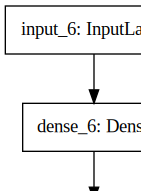

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

#Train

In [32]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0734 - val_loss: 0.0226
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0198 - val_loss: 0.0129
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0119 - val_loss: 0.0087
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0044 - val_loss: 0.0042

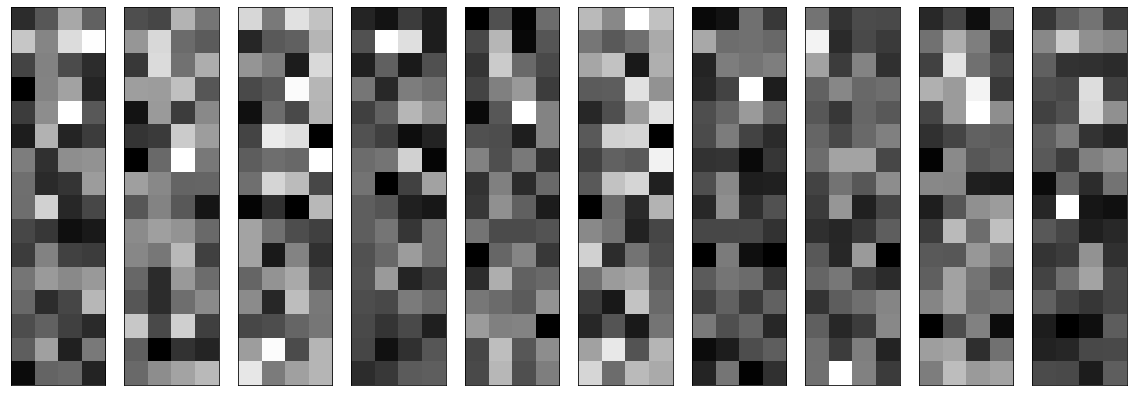

In [33]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Predict on the test set

In [34]:
decoded_imgs = autoencoder.predict(X_test)

#Plot

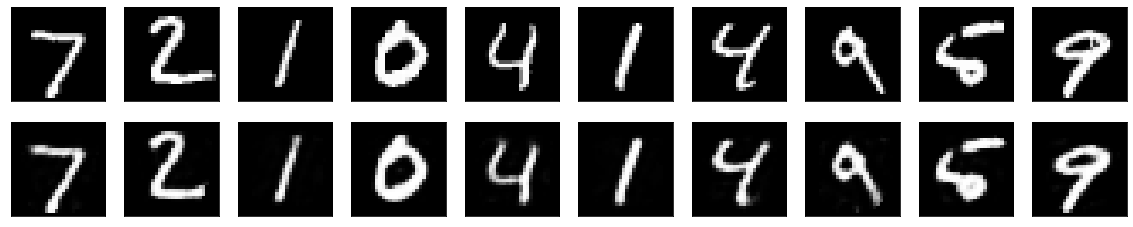

In [35]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Plot the losses

dict_keys(['loss', 'val_loss'])


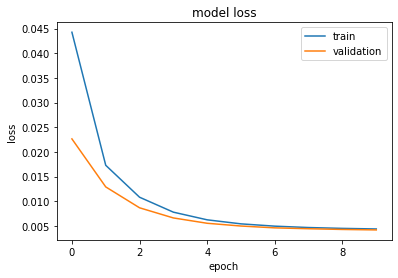

In [36]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 2) MultiLayer Encoder

Create the network

We extend the idea of the first network to more layers

In [37]:
input_size = 784
hidden_size = 128
code_size = 64

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

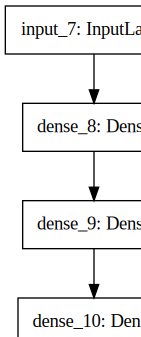

In [38]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

#Train the Network

In [39]:
epochs = 10
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0698 - val_loss: 0.0194
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0177 - val_loss: 0.0131
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0127 - val_loss: 0.0105
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0093 - val_loss: 0.0083
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0064 - val_loss: 0.0062

#Predict on the test set

In [40]:
decoded_imgs = autoencoder.predict(X_test)

#Plot

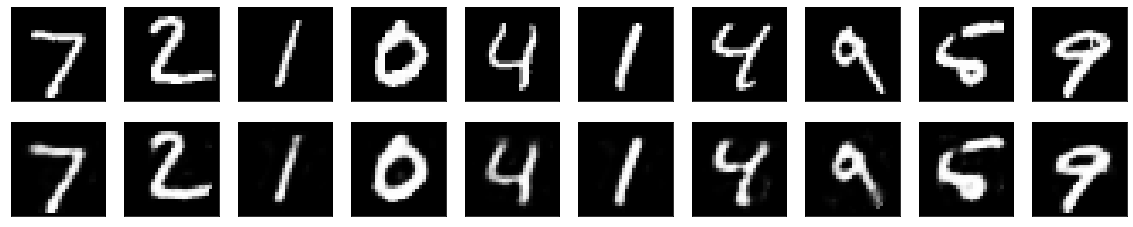

In [41]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


#Plot the losses

dict_keys(['loss', 'val_loss'])


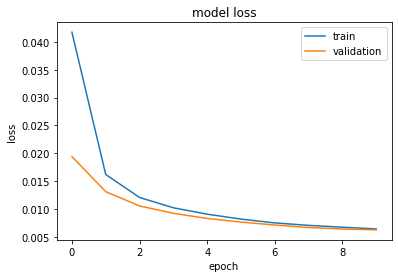

In [42]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#3) Convolutional Autoencoder

In [43]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Create the network
This network does not take flattened vectors as an input but images

In [44]:
x = Input(shape=(28, 28,1)) 

# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


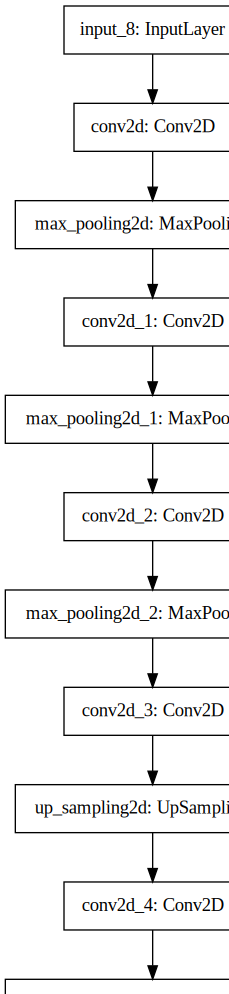

In [45]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

#Train

In [47]:
epochs = 3
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))


Epoch 1/3
469/469 [==============================] - 74s 158ms/step - loss: 0.6725 - val_loss: 0.6667
Epoch 2/3
469/469 [==============================] - 74s 158ms/step - loss: 0.6581 - val_loss: 0.6477
Epoch 3/3
469/469 [==============================] - 74s 158ms/step - loss: 0.6311 - val_loss: 0.6109


In [48]:
decoded_imgs = autoencoder.predict(X_test)

#Plot

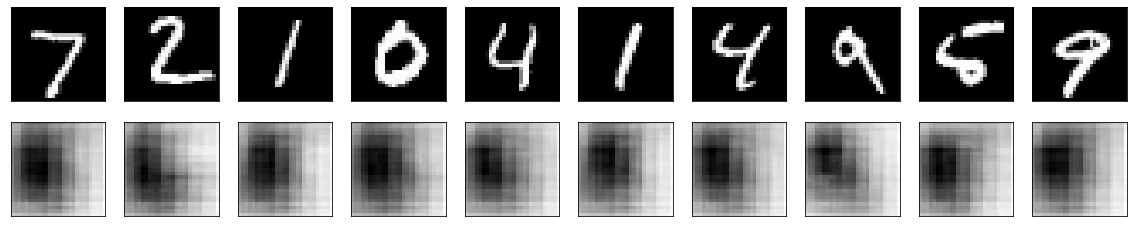

In [49]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Plot the losses 

dict_keys(['loss', 'val_loss'])


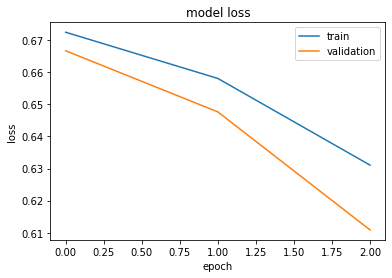

In [51]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()